In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("groceries.csv",header=None, sep='\t')

In [5]:
df.head(10)

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
5,"whole milk,butter,yogurt,rice,abrasive cleaner"
6,rolls/buns
7,"other vegetables,UHT-milk,rolls/buns,bottled b..."
8,potted plants
9,"whole milk,cereals"


In [6]:
df = df[0].str.split(',', expand=True)

In [7]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,whole milk,butter,yogurt,rice,abrasive cleaner,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,rolls/buns,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,potted plants,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,whole milk,cereals,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [8]:
import numpy as np
basket = np.array(df)

In [9]:
basket

array([['citrus fruit', 'semi-finished bread', 'margarine', ..., None,
        None, None],
       ['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], dtype=object)

In [10]:
# Lấy chỉ mục của các phần tử khác None
non_none_indices = np.where(basket != None)

# Lấy các giá trị khác None từ mảng
non_none_values = basket[non_none_indices]

print(non_none_values)

['citrus fruit' 'semi-finished bread' 'margarine' ... 'other vegetables'
 'vinegar' 'shopping bags']


In [11]:
basket = [[x for x in row if str(x)!='None']for row in basket]

In [12]:
basket

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [13]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(basket).transform(basket).astype("int")
te_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
dt=pd.DataFrame(te_array, columns=te.columns_)

In [15]:
dt.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## a) Tìm tất cả các tập phổ biến trong từng trường hợp bằng giải thuật Apriori và ghi nhận thời gian xử lý của thuật toán.
Import thư viện để tính thời gian

In [16]:
# khởi tạo giá trị mảng minsup
minsupp = np.linspace(0.01, 0.1, num = 10)
minsupp = np.round(minsupp,2)
print(minsupp)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]


In [17]:
from datetime import datetime, timedelta
import time

In [18]:
Time_Ap = []
Time_FP = []

In [19]:
# Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.01.
start_Ap_l1 = time.time()
itemsets = apriori(dt, min_support=0.01, use_colnames = True)
end_Ap_l1 = time.time()
print(timedelta(seconds=round(end_Ap_l1-start_Ap_l1,5)))
Time_Ap.append(end_Ap_l1-start_Ap_l1)
itemsets.head()

0:00:01.139850


,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)


In [20]:
# Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.02.
start_Ap_l2 = time.time()
itemsets = apriori(dt, min_support=0.02, use_colnames = True)
end_Ap_l2 = time.time()
print(timedelta(seconds=round(end_Ap_l2-start_Ap_l2,5)))
Time_Ap.append(end_Ap_l2-start_Ap_l2)
itemsets.head()

0:00:00.344880


,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)


In [21]:
# Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.03.
start_Ap_l3 = time.time()
itemsets = apriori(dt, min_support=0.03, use_colnames = True)
end_Ap_l3 = time.time()
print(timedelta(seconds=round(end_Ap_l3-start_Ap_l1,3)))
Time_Ap.append(end_Ap_l3-start_Ap_l3)
itemsets.head()

0:00:01.755000


,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.080529,(bottled beer)
4,0.110524,(bottled water)


In [22]:
# Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.04.
start_Ap_l4 = time.time()
itemsets = apriori(dt, min_support=0.04, use_colnames = True)
end_Ap_l4 = time.time()
print(timedelta(seconds=round(end_Ap_l4-start_Ap_l1,4)))
Time_Ap.append(end_Ap_l4-start_Ap_l4)
itemsets.head()

0:00:01.897900


,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)


In [23]:
# Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.05.
start_Ap_l5 = time.time()
itemsets = apriori(dt, min_support=0.05, use_colnames = True)
end_Ap_l5 = time.time()
print(timedelta(seconds=round(end_Ap_l5-start_Ap_l5,5)))
Time_Ap.append(end_Ap_l5-start_Ap_l5)
itemsets.head()

0:00:00.086380


,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)


In [24]:
# Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.06.
start_Ap_l6 = time.time()
itemsets = apriori(dt, min_support=0.06, use_colnames = True)
end_Ap_l6 = time.time()
print(timedelta(seconds=round(end_Ap_l6-start_Ap_l6,5)))
Time_Ap.append(end_Ap_l6-start_Ap_l6)
itemsets.head()

0:00:00.054020


,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.064870,(brown bread)
3,0.077682,(canned beer)
4,0.082766,(citrus fruit)


In [25]:
# Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.07.
start_Ap_l7 = time.time()
itemsets = apriori(dt, min_support=0.07, use_colnames = True)
end_Ap_l7 = time.time()
print(timedelta(seconds=round(end_Ap_l7-start_Ap_l7,5)))
Time_Ap.append(end_Ap_l7-start_Ap_l7)
itemsets.head()

0:00:00.045350


,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.077682,(canned beer)
3,0.082766,(citrus fruit)
4,0.072293,(fruit/vegetable juice)


In [26]:
# Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.08.
start_Ap_l8 = time.time()
itemsets = apriori(dt, min_support=0.08, use_colnames = True)
end_Ap_l8 = time.time()
print(timedelta(seconds=round(end_Ap_l8-start_Ap_l8,5)))
Time_Ap.append(end_Ap_l8-start_Ap_l8)
itemsets.head()

0:00:00.031460


,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.082766,(citrus fruit)
3,0.193493,(other vegetables)
4,0.088968,(pastry)


In [27]:
# Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.09.
start_Ap_l9 = time.time()
itemsets = apriori(dt, min_support=0.09, use_colnames = True)
end_Ap_l9 = time.time()
print(timedelta(seconds=round(end_Ap_l9-start_Ap_l9,5)))
Time_Ap.append(end_Ap_l9-start_Ap_l9)
itemsets

0:00:00.030980


,support,itemsets
0,0.110524,(bottled water)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.108998,(root vegetables)
4,0.093950,(sausage)
5,0.098526,(shopping bags)
6,0.174377,(soda)
7,0.104931,(tropical fruit)
8,0.255516,(whole milk)
9,0.139502,(yogurt)


In [28]:
# Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.1.
start_Ap_l10 = time.time()
itemsets = apriori(dt, min_support=0.1, use_colnames = True)
end_Ap_l10 = time.time()
print(timedelta(seconds=round(end_Ap_l10-start_Ap_l10,5)))
Time_Ap.append(end_Ap_l10-start_Ap_l10)
itemsets.head()

0:00:00.027930


,support,itemsets
0,0.110524,(bottled water)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.108998,(root vegetables)
4,0.174377,(soda)


## b) Tìm tất cả các tập phổ biến trong từng trường hợp bằng giải thuật FP-Growth và ghi nhận thời gian xử lý của thuật toán.

In [29]:
# Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.01.
start_FP_l1 = time.time()
itemsets = fpgrowth(dt, min_support=0.01, use_colnames = True)
end_FP_l1 = time.time()
print(timedelta(seconds=round(end_FP_l1-start_FP_l1,5)))
Time_FP.append(end_FP_l1-start_FP_l1)
itemsets.head()

0:00:00.522480


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)


In [30]:
# Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.02.
start_FP_l2 = time.time()
itemsets = fpgrowth(dt, min_support=0.02, use_colnames = True)
end_FP_l2 = time.time()
print(timedelta(seconds=round(end_FP_l2-start_FP_l2,5)))
Time_FP.append(end_FP_l2-start_FP_l2)
itemsets.head()

0:00:00.302310


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)


In [31]:
# Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.03.
start_FP_l3 = time.time()
itemsets = fpgrowth(dt, min_support=0.03, use_colnames = True)
end_FP_l3 = time.time()
print(timedelta(seconds=round(end_FP_l3-start_FP_l3,5)))
Time_FP.append(end_FP_l3-start_FP_l3)
itemsets.head()

0:00:00.278040


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)


In [32]:
# Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.04.
start_FP_l4 = time.time()
itemsets = fpgrowth(dt, min_support=0.04, use_colnames = True)
end_FP_l4 = time.time()
print(timedelta(seconds=round(end_FP_l4-start_FP_l4,5)))
Time_FP.append(end_FP_l4-start_FP_l4)
itemsets.head()

0:00:00.224530


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)


In [33]:
# Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.05.
start_FP_l5 = time.time()
itemsets = fpgrowth(dt, min_support=0.05, use_colnames = True)
end_FP_l5 = time.time()
print(timedelta(seconds=round(end_FP_l5-start_FP_l5,5)))
Time_FP.append(end_FP_l5-start_FP_l5)
itemsets.head()

0:00:00.350200


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)


In [34]:
# Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.06.
start_FP_l6 = time.time()
itemsets = fpgrowth(dt, min_support=0.06, use_colnames = True)
end_FP_l6 = time.time()
print(timedelta(seconds=round(end_FP_l6-start_FP_l6,5)))
Time_FP.append(end_FP_l6-start_FP_l6)
itemsets.head()

0:00:00.173500


,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.075648,(pip fruit)


In [35]:
# Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.07.
start_FP_l7 = time.time()
itemsets = fpgrowth(dt, min_support=0.07, use_colnames = True)
end_FP_l7 = time.time()
print(timedelta(seconds=round(end_FP_l7-start_FP_l7,5)))
Time_FP.append(end_FP_l7-start_FP_l7)
itemsets.head()

0:00:00.158490


,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.075648,(pip fruit)


In [36]:
# Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.08.
start_FP_l8 = time.time()
itemsets = fpgrowth(dt, min_support=0.08, use_colnames = True)
end_FP_l8 = time.time()
print(timedelta(seconds=round(end_FP_l8-start_FP_l8,5)))
Time_FP.append(end_FP_l8-start_FP_l8)
itemsets.head()

0:00:00.133970


,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.193493,(other vegetables)


In [37]:
# Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.09.
start_FP_l9 = time.time()
itemsets = fpgrowth(dt, min_support=0.09, use_colnames = True)
end_FP_l9 = time.time()
print(timedelta(seconds=round(end_FP_l9-start_FP_l9,5)))
Time_FP.append(end_FP_l9-start_FP_l9)
itemsets.head()

0:00:00.146250


,support,itemsets
0,0.139502,(yogurt)
1,0.104931,(tropical fruit)
2,0.255516,(whole milk)
3,0.193493,(other vegetables)
4,0.183935,(rolls/buns)


In [38]:
# Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.1.
start_FP_l10 = time.time()
itemsets = fpgrowth(dt, min_support=0.1, use_colnames = True)
end_FP_l10 = time.time()
print(timedelta(seconds=round(end_FP_l10-start_FP_l10,5)))
Time_FP.append(end_FP_l10-start_FP_l10)
itemsets.head()

0:00:00.108510


,support,itemsets
0,0.139502,(yogurt)
1,0.104931,(tropical fruit)
2,0.255516,(whole milk)
3,0.193493,(other vegetables)
4,0.183935,(rolls/buns)


### Thời gian của từng thuật toán đưa vào mảng

In [39]:
# Apriori
Time_Ap

[1.139847993850708,
 0.34488368034362793,
 0.2162189483642578,
 0.11567521095275879,
 0.0863790512084961,
 0.054021358489990234,
 0.045345306396484375,
 0.031459808349609375,
 0.03098011016845703,
 0.02792811393737793]

In [40]:
# FP-Growth
Time_FP

[0.5224771499633789,
 0.3023056983947754,
 0.2780447006225586,
 0.2245314121246338,
 0.35019874572753906,
 0.17349910736083984,
 0.15848946571350098,
 0.1339716911315918,
 0.14624905586242676,
 0.10850882530212402]

## c) Vẽ biểu đồ so sánh thời gian xử lý của hai thuật toán trên với nhau.

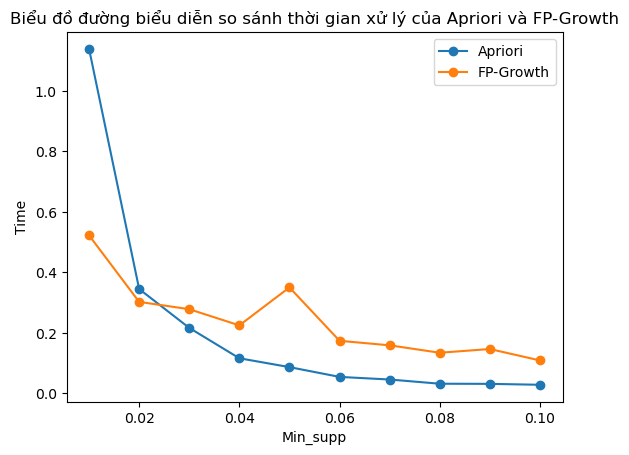

In [41]:
# Vẽ biểu đồ
# So sánh hai thuật toán 
import matplotlib.pyplot as plt
# Số lần lặp
iterations = range(1, len(Time_Ap) + 1)

minsupp

# Vẽ biểu đồ
plt.plot(minsupp, Time_Ap, marker='o', label='Apriori')
plt.plot(minsupp, Time_FP, marker='o', label='FP-Growth')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ đường biểu diễn so sánh thời gian xử lý của Apriori và FP-Growth')

# Đặt nhãn cho trục x và y
plt.xlabel('Min_supp')
plt.ylabel('Time')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [42]:
data = {"Time_Ap": Time_Ap, "Time_FP": Time_FP}
table = pd.DataFrame(data, minsupp)
table

,Time_Ap,Time_FP
0.01,1.139848,0.522477
0.02,0.344884,0.302306
0.03,0.216219,0.278045
0.04,0.115675,0.224531
0.05,0.086379,0.350199
0.06,0.054021,0.173499
0.07,0.045345,0.158489
0.08,0.031460,0.133972
0.09,0.030980,0.146249
0.10,0.027928,0.108509


#### Ban đầu, khi min_sup = 0.01, thuật toán FP-Growth tốn ít thời gian hơn so với thuật toán Apriori:
Với min_sup nhỏ, FP-Growth có ưu điểm hơn bởi nó sử dụng cấu trúc cây FP-Tree để hiệu quả hóa việc tìm kiếm và tính toán các tập phổ biến, giảm thiểu thời gian xử lý so với Apriori.

#### Khi min_sup càng lớn, thuật toán Apriori chạy nhanh hơn thuật toán FP-Growth:
Apriori cải thiện hiệu suất khi min_sup lớn bởi nó không cần tạo và duy trì một cây dữ liệu như FP-Growth. Thay vào đó, nó chỉ cần quét dữ liệu một lần để tìm tất cả các tập hỗ trợ đủ lớn.

#### min_sup nhỏ thì thuật toán FP-Growth chạy nhanh hơn:
Khi min_sup nhỏ, FP-Growth phù hợp hơn với sức mạnh của nó trong việc xử lý dữ liệu lớn với số lượng mẫu lớn. Sử dụng cây dữ liệu FP-Tree giúp FP-Growth giảm thiểu thời gian xử lý so với Apriori trong trường hợp này.